In [1]:
import sys
sys.path.append("/Users/octavia/Dropbox/SVE_v2/utilities")
sys.path.append('/Users/octavia/Dropbox/SVE_v2/GW_model')

infl_modules = ['philips_infl', 'connect_SVE', 'GA_infl']
modules = ['search_functions', 'plot_functions', 'load_model_output',
           'gw_functions', 'SVE_mass_check']

for mod in modules + infl_modules:
    if mod in sys.modules: 
        del sys.modules[mod]


from gw_functions import *
from plot_functions import *

from philips_infl import *


No matched hydrographs here


In [2]:
param = {'ksatV': 1/3.6e5,
         'rain': 5/3.6e5,
         'So': 0.1,
        'eta' : 0.5,
        'alpha' : 0.1,
         'a': 2./3,
         't_rain': 1200,
         'L': 50.0,
         'dt': 1.0,
         'ntstep': 500,
         'delta_theta': 0.24,
         'Ao': 0.00025}
res = Comparison_function2(param)
res = pd.Series(res)

# param = get_philip_param(sim)

philips_i =  compute_philip_infl(param)


(0, 5.135021014495985)

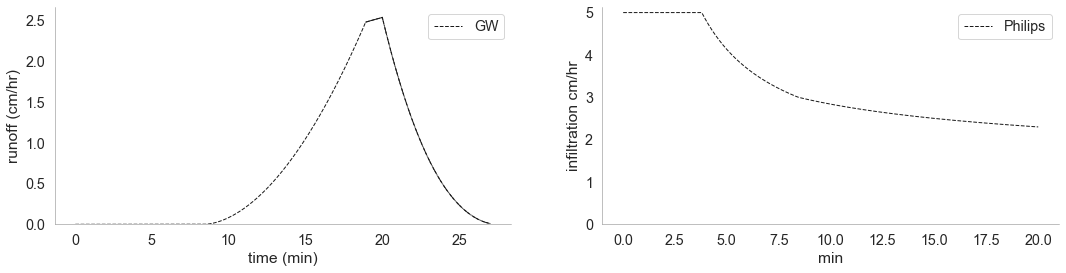

In [3]:

fig, axes = plt.subplots(1, 2, figsize = (18, 4))
ax = axes[0]
ax.plot(res.t/60, res.q/res.L*3.6e5, 'k--', label = "GW")
ax.plot(res.t_d2/60, res.q_d2/res.L*3.6e5, 'k-')
ax.plot(res.t_d3/60, res.q_d3/res.L*3.6e5, 'k-.')
plt.xlabel("min")
ax.set_ylim(0, )
# ax.plot(sim.t_h/60, sim.flux3/sim.area*3.6e5, '-', label = "SVE")
ax.legend()
ax.set_ylabel("runoff (cm/hr)")
ax.set_xlabel("time (min)")

ax = axes[1]
# ax.plot(sim.t_print[1:]/60, sim.infl_3d[1:,0,0]*3.6e5, label = "SVE")
ax.plot(philips_i["t"]/60., philips_i["f"]*3.6e5, 'k--', label = "Philips")
ax.set_ylabel("infiltration cm/hr")
plt.xlabel("min")
plt.legend()
ax.set_ylim(0, )

Text(0, 0.5, 'Infiltration (m)')

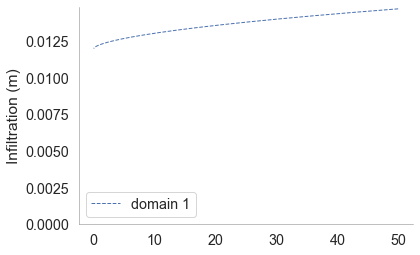

In [4]:
xf2 = res['x_f2']
tf2 = res['t_f2']
xf = res['x_f']
tf = res['t_f']
L = param['L']
fig, ax = plt.subplots(1)

if np.any(xf<L):
    I = compute_philip_F(param, tf[xf<L])
    ax.plot(xf[xf<L],  I , '--', label = "domain 1")
if np.any(xf2<L):
    I = compute_philip_F(param, tf2[xf2<L])
    ax.plot(xf2[xf2<L], I , '--', label = "domain 2")
ax.legend()
ax.set_ylim(0, )
ax.set_ylabel("Infiltration (m)")

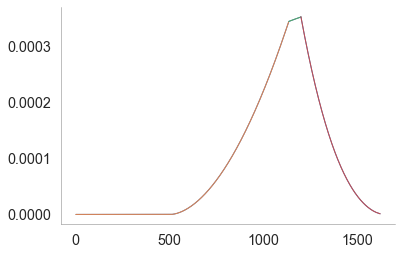

In [5]:
plt.plot(res['t'], res['q'])
plt.plot(res['t_d1'], res['q_d1'])
plt.plot(res['t_d2'], res['q_d2'])
plt.plot(res['t_d3'], res['q_d3'])

# plt.plot(sim.t_h, sim.flux3/sim.Ly, '--')


In [6]:
univariate = ['ksatV', 'rain', 'So', 'eta', 'alpha', 'a', 't_rain', 
                    'L', 'ntstep', 'delta_theta', 'Ao', 'Kr', 't_pond']  


# 'x_f', 'is_raining', 'Teq', 'case', 'case-v', 't_f', 'h_f', 't', 'q',
# 't_d1', 'q_d1', 't_d2', 'q_d2', 't_d3', 'q_d3', 't_f2', 'x_f2', 'Q',
# 'PPT', 'infl_frac'